In [13]:
import pandas as pd

data = pd.read_csv('data_cleaned.csv')

# Display the first few rows of the dataset to understand its structure
print(data.head())

print(data.head)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  PTRATIO  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1     15.3   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2     17.8   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2     17.8   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  

Variance: 22.6367, Bias2: 37.1555, Total error: 59.7922
Variance: 18.1447, Bias2: 31.0517, Total error: 49.1965
Variance: 66.1784, Bias2: 122.1551, Total error: 188.3334
Variance: 40.6760, Bias2: 79.3001, Total error: 119.9761
Variance: 39.0729, Bias2: 81.3001, Total error: 120.3731
Variance: 68.5658, Bias2: 102.4709, Total error: 171.0367
Variance: 33.5109, Bias2: 32.2226, Total error: 65.7335
Variance: 43.3102, Bias2: 79.9658, Total error: 123.2760
Total error of the best model: 49.196478510117146
Degree: 1 # of K folds: 8 MSE: 45.49124934499818 

Variance: 22.3323, Bias2: 36.3520, Total error: 58.6843
Variance: 19.5693, Bias2: 30.5616, Total error: 50.1310
Variance: 38.9485, Bias2: 101.6674, Total error: 140.6159
Variance: 27.8927, Bias2: 74.6617, Total error: 102.5545
Variance: 46.8105, Bias2: 88.1425, Total error: 134.9530
Variance: 22.2738, Bias2: 25.6233, Total error: 47.8971
Variance: 80.3803, Bias2: 146.5387, Total error: 226.9190
Variance: 34.8009, Bias2: 50.1797, Total error

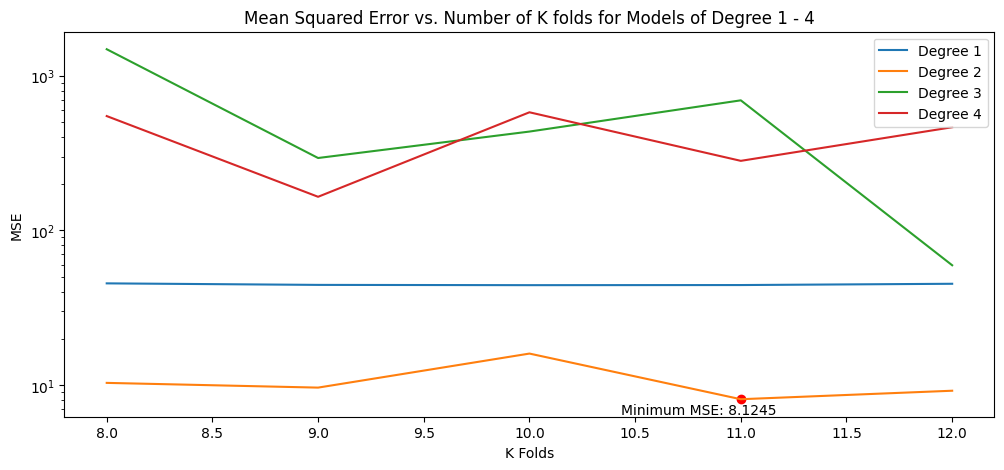

MSE of best model: 8.12451


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def polynomial_regression(degree, X, y, folds, test_size=0.25, random_state=None):
    # Define number of folds for cross-validation
    kf = KFold(folds)

    # Initialize lists to store results for variance, bias2s, total_error, and models
    variance = []
    bias2s = []
    total_error = []
    models = []
    r2scores = []

    # Set the polynomial degree of the model
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X)

    # Perform cross-validation
    for train_index, test_index in kf.split(X_poly):
        # Split data into training and testing sets for this fold
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Fit polynomial regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate variance, bias, and R^2 for this fold
        variance_test = np.mean((np.mean(y_pred)-model.predict(X_test))**2)
        bias_test = np.mean((np.mean(model.predict(X_test))- y_test) ** 2)
        r2_test = r2_score(y_test, y_pred)

        # Append results to lists
        variance.append(variance_test)
        r2scores.append(r2_test)
        bias2s.append(bias_test)
        total_error.append(variance_test + bias_test)
        models.append(model)

        # Print results for this fold
        print("Variance: {:.4f}, Bias2: {:.4f}, Total error: {:.4f}".format(variance[-1], bias2s[-1], bias2s[-1] + variance[-1]))

    # print the total_error of the best model
    min_error_index = np.argmin(total_error) # returns an index that corresponds to the min value
    best_model = models[min_error_index]

    print("Total error of the best model:", total_error[min_error_index])

    # Testing the final model on the test data
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=42)
    
    # Obtain the predictions on the test data
    y_test_pred = best_model.predict(X_test)
        
    # store mse score of the model applied on the test data
    mse = mean_squared_error(y_test, y_test_pred)
    
    return mse , best_model

X = data.drop(columns=["MEDV"])

# Set the target variable 
y = data['MEDV']

# Try degrees from 1 to 5 and in a loop, report mse of the best model trained using k-fold cross validation and print("Degree:", degree, "MSE:", mse)
degrees = range(1, 8)  # Try polynomial degrees from 1 to 5

# Initialize lists to store MSE values for each degree and K fold
mse_values_degree = []

# Range of K fold values to iterate through
K_folds = range(8,13)

for degree in range(1, 5):
    # Initialize list to store MSE values for the current degree
    mse_degree = []
    
    for k in K_folds:
        # Perform polynomial regression with the current degree
        mse, best_model = polynomial_regression(degree, X, y, folds=k)
        
        # Store the MSE value
        mse_degree.append(mse)
        
        # Print the degree and corresponding MSE
        print("Degree:", degree, "# of K folds:", k,  "MSE:", mse,"\n")
    
    # Store the MSE values for the current degree
    mse_values_degree.append(mse_degree)

# Convert the lists to numpy arrays for easier manipulation
mse_values_degree = np.array(mse_values_degree)

# Find the minimum MSE value and its corresponding degree and K fold
min_mse = np.min(mse_values_degree)
min_degree, min_k = np.unravel_index(np.argmin(mse_values_degree), mse_values_degree.shape)

# Adjust min_k to match the start of your K_fold_list
min_k += K_folds[0]

# Create a new figure with the desired size
plt.figure(figsize=(12, 5))

# Plot MSE values for each degree
for i, degree in enumerate(range(1, 5)):
    plt.plot(K_folds, mse_values_degree[i], label=f'Degree {degree}')

# Highlight the point with minimum MSE
plt.scatter(min_k, min_mse, color='red')
plt.annotate(f'Minimum MSE: {min_mse:.4f}', (min_k, min_mse), textcoords="offset points", xytext=(-30,-11), ha='center')

plt.title('Mean Squared Error vs. Number of K folds for Models of Degree 1 - 4')    
plt.xlabel('K Folds')
plt.ylabel('MSE')
plt.legend(loc='upper right')
plt.yscale('log')
plt.show()

print('MSE of best model:', np.round(min_mse,decimals=6))


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different values for n_estimators
n_estimators_values = [50, 100, 150, 200]

for n_estimators in n_estimators_values:
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"n_estimators = {n_estimators}: Mean Squared Error = {mse:.2f}")

n_estimators = 50: Mean Squared Error = 17.15
n_estimators = 100: Mean Squared Error = 16.90
n_estimators = 150: Mean Squared Error = 16.99
n_estimators = 200: Mean Squared Error = 17.20


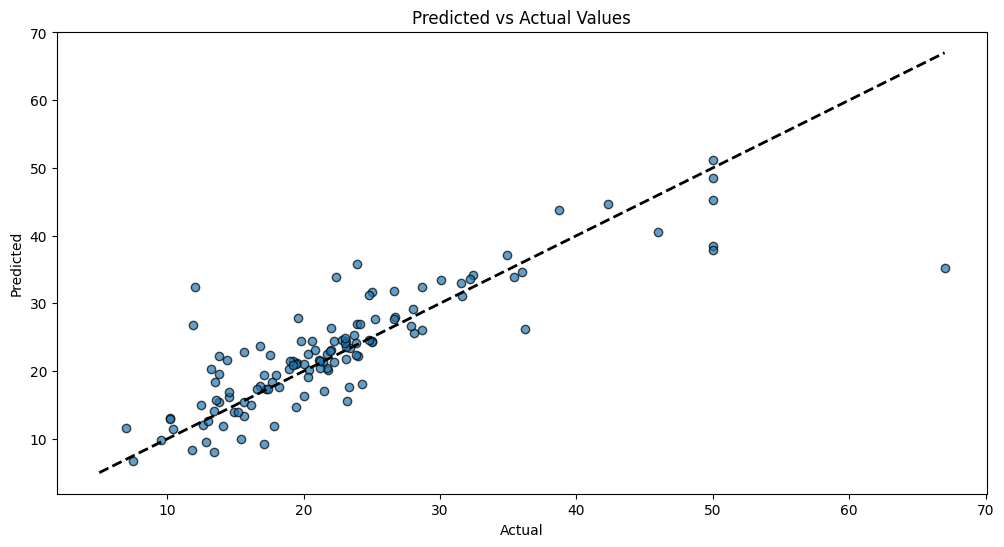

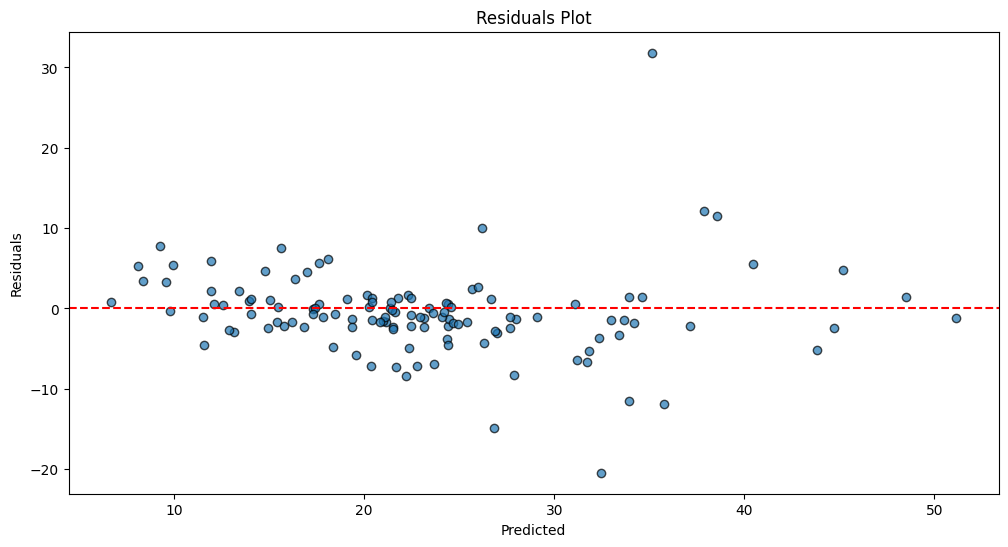

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define the best model based on previous findings
best_degree = 2
best_k_folds = 11

# Prepare the polynomial features
poly_features = PolynomialFeatures(best_degree)
X_poly = poly_features.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=42)

# Fit the best model
best_model = LinearRegression()
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Plot Predicted vs Actual Values
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, edgecolor='k', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual Values')
plt.show()

# Plot Residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_test_pred, residuals, edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [11]:
import pickle

# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

# Save the polynomial features transformer
with open('poly_features.pkl', 'wb') as f:
    pickle.dump(poly_features, f)